Importing Libraries and Dataset

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [40]:
train_data = pd.read_csv('train.csv')

C:\Users\Brian.Kipkemboi2\AppData\Local\Temp\ipykernel_18368\1658324130.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


In [41]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [43]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#### Checking competition distance

In [44]:
store_data = pd.read_csv('store.csv')

In [45]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### EDA

<Axes: >

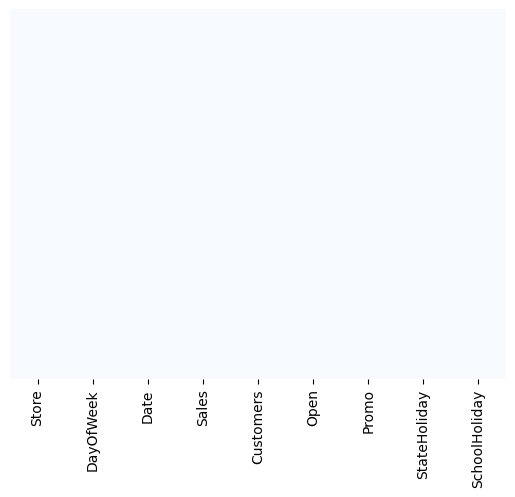

In [46]:
# Checking for missing data
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

 - There are no null records

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

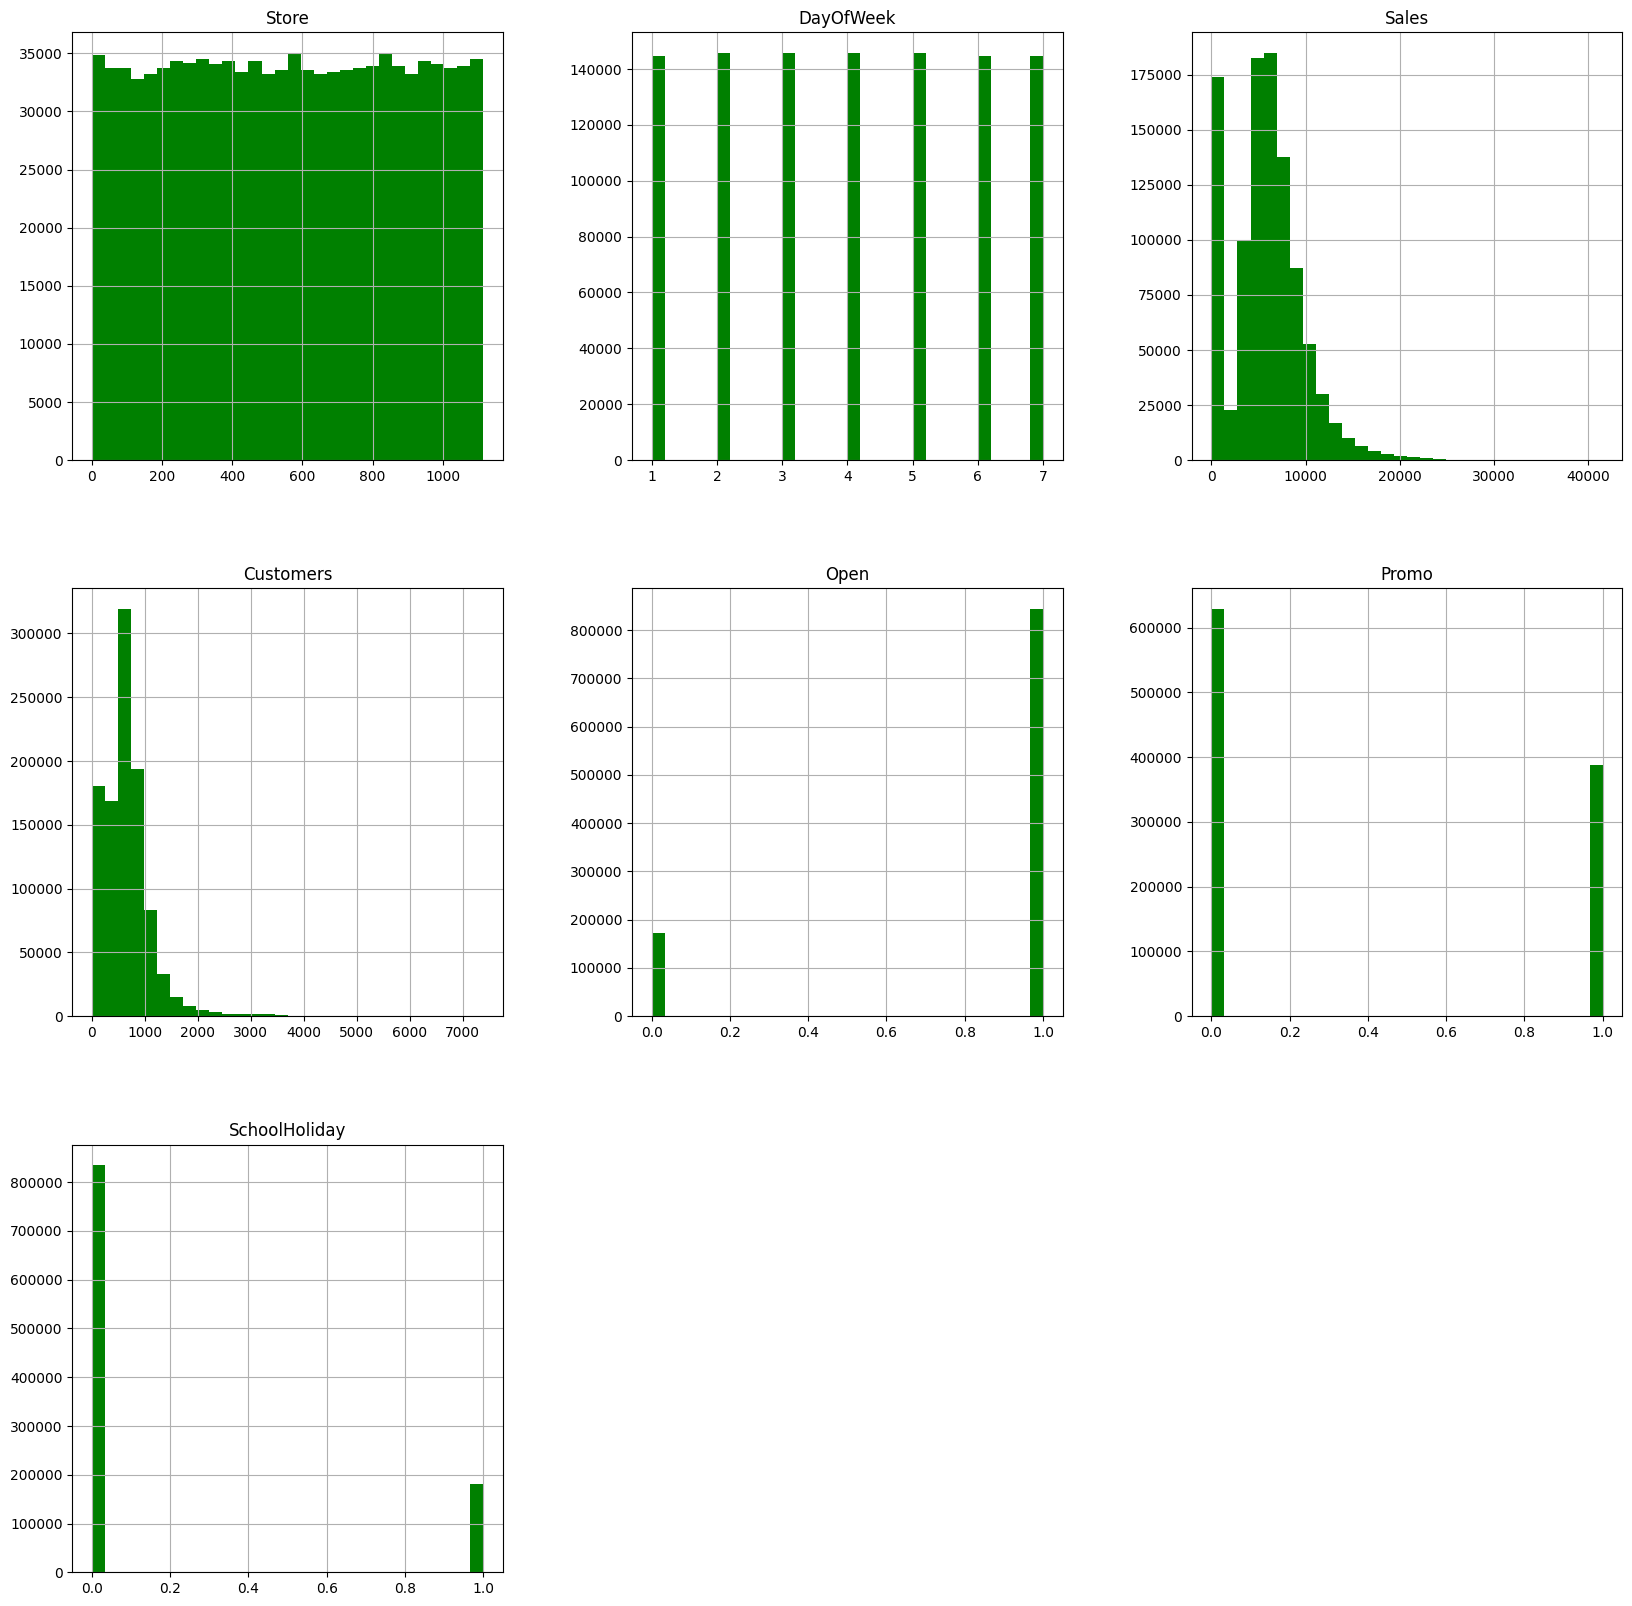

In [47]:
train_data.hist(bins = 30, figsize= (20,20), color = 'g' )

In [48]:
train_data['Customers'].max()

7388


#### No of Closed and Opened shops

In [49]:
closed_train = train_data[train_data['Open'] == 0]
open_train = train_data[train_data['Open'] == 1]

In [50]:
print('Total = ', len(train_data))
print('Closed = ', len(closed_train))
print('Open = ', len(open_train))

Total =  1017209
Closed =  172817
Open =  844392


In [51]:
train_data = train_data[train_data['Open'] == 1]

In [52]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [53]:
train_data.drop(['Open'], axis=1, inplace=True)

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [55]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


#### Stores

<Axes: >

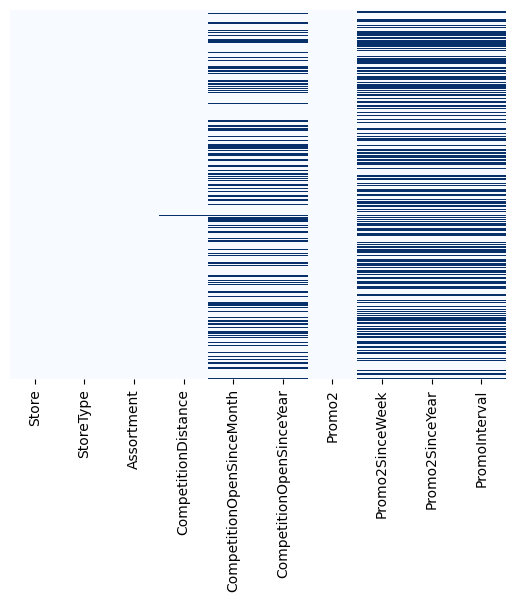

In [56]:
sns.heatmap(store_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

### Checking for the missing values

In [57]:
store_data[store_data['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [58]:
store_data[store_data['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [59]:
store_data[store_data['Promo2'] ==0 ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [60]:
str_col = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

In [61]:
for str in str_col:
    store_data[str].fillna(0, inplace=True)

C:\Users\Brian.Kipkemboi2\AppData\Local\Temp\ipykernel_18368\2954426422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data[str].fillna(0, inplace=True)


<Axes: >

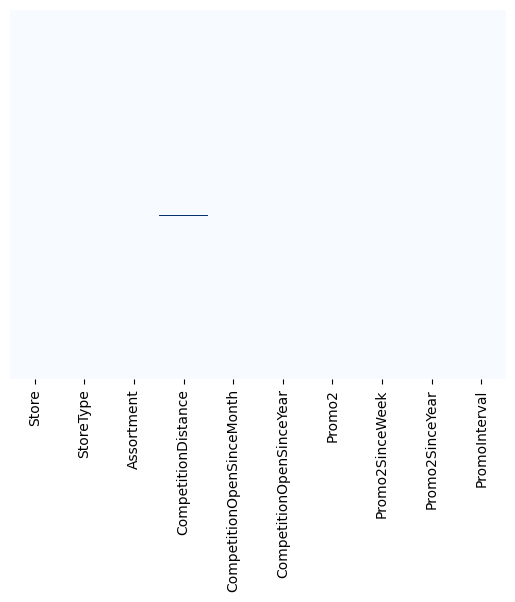

In [62]:
sns.heatmap(store_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [63]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace=True)

C:\Users\Brian.Kipkemboi2\AppData\Local\Temp\ipykernel_18368\3242326071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace=True)


<Axes: >

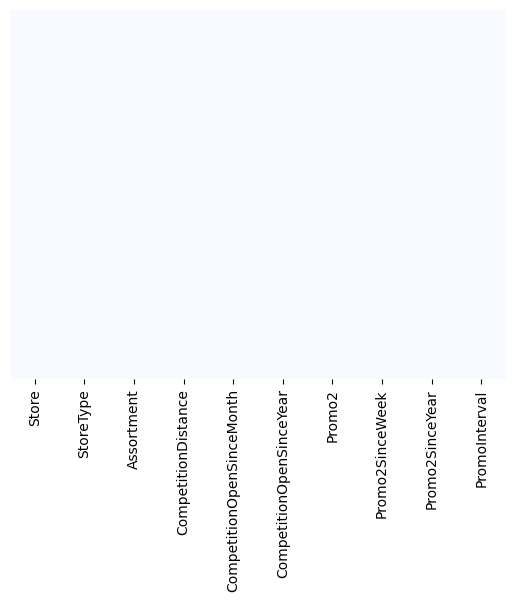

In [64]:
sns.heatmap(store_data.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

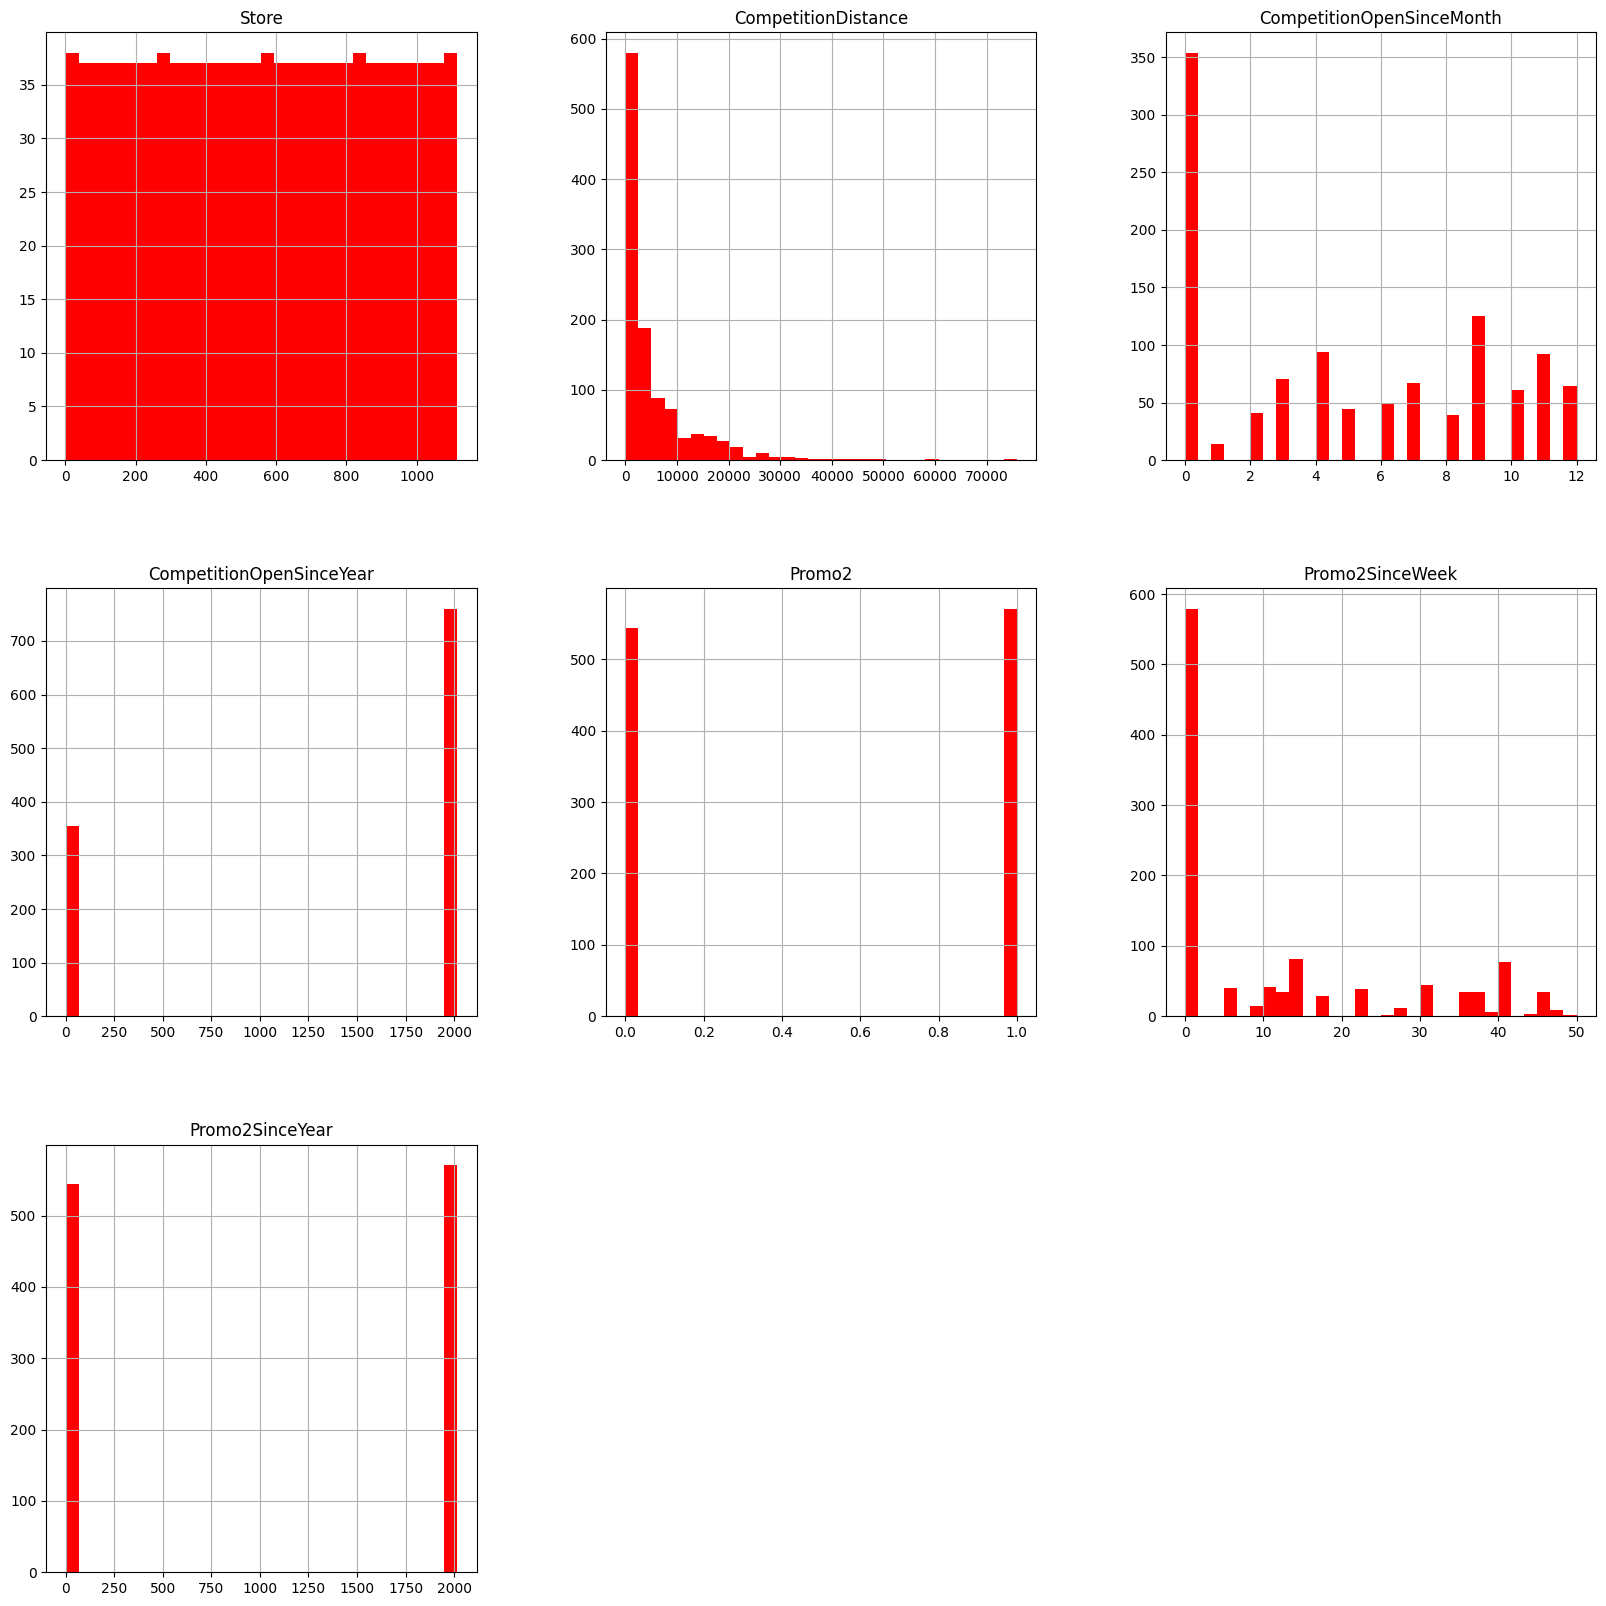

In [65]:
store_data.hist(bins=30, figsize=(20,20), color = 'red')

#### Merging Datasets

In [66]:
all_sales = pd.merge(train_data,store_data,on='Store', how='inner')

In [67]:
all_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


#### Check for correlations

In [69]:
correlations = all_sales.select_dtypes(include='number').corr()['Sales'].sort_values()

correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<Axes: >

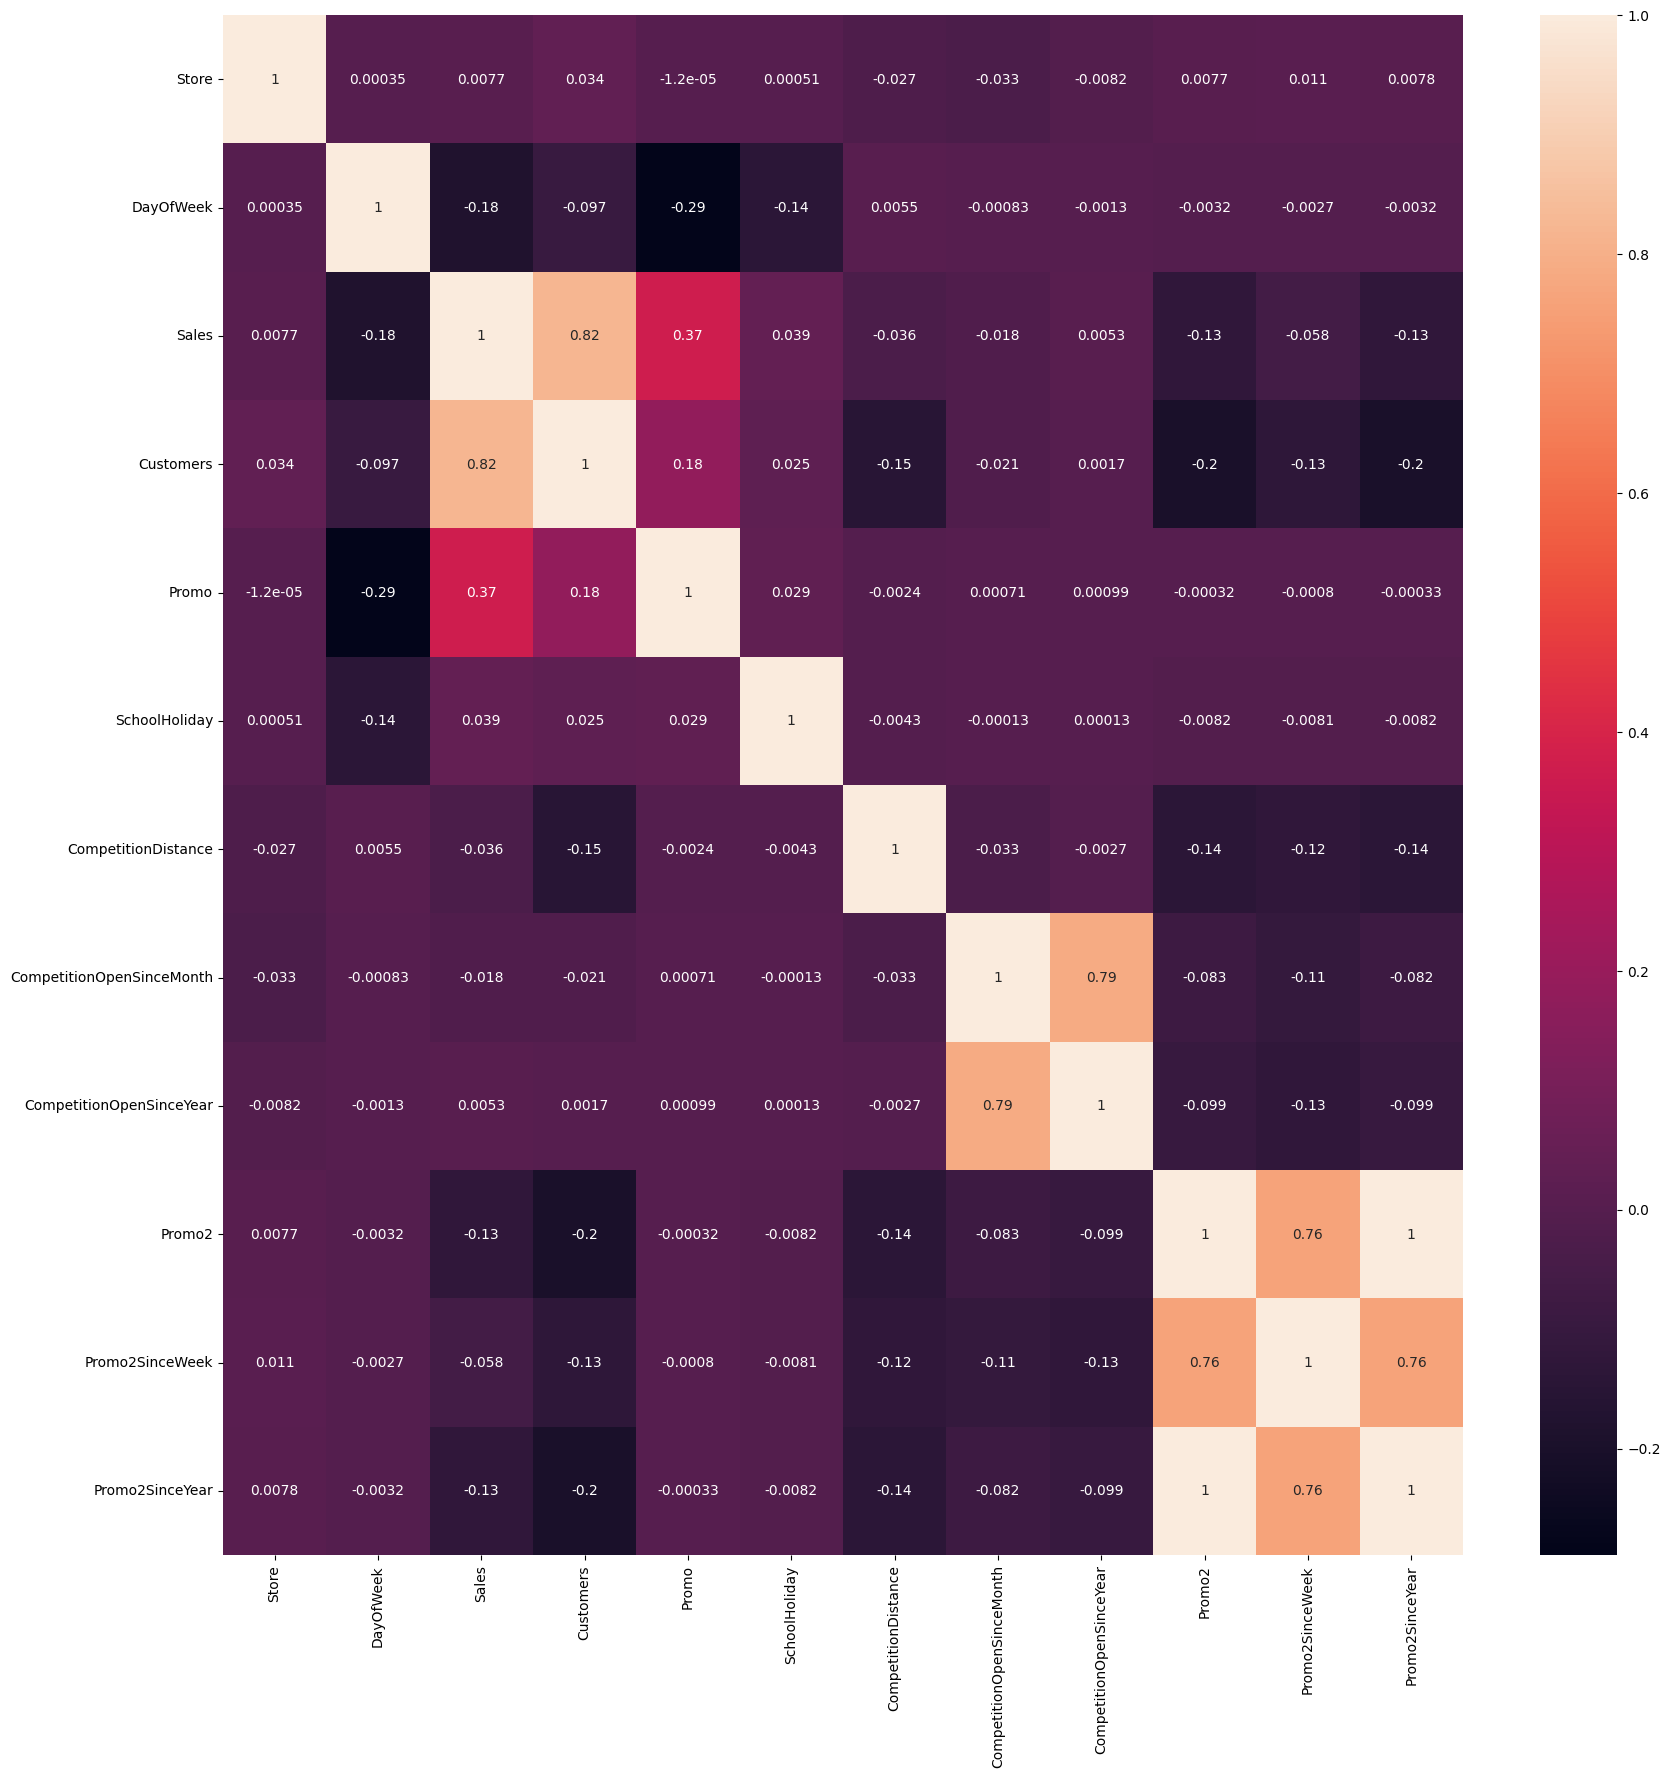

In [70]:
correlations = all_sales.select_dtypes(include='number').corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

### Extract Year Month and Day

In [71]:
all_sales['Year'] = pd.DatetimeIndex(all_sales['Date']).year

In [72]:
all_sales

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013


In [73]:
all_sales['Month'] = pd.DatetimeIndex(all_sales['Date']).month
all_sales['Day'] = pd.DatetimeIndex(all_sales['Date']).day

In [74]:
all_sales

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


Average Sales and Number of customers per month

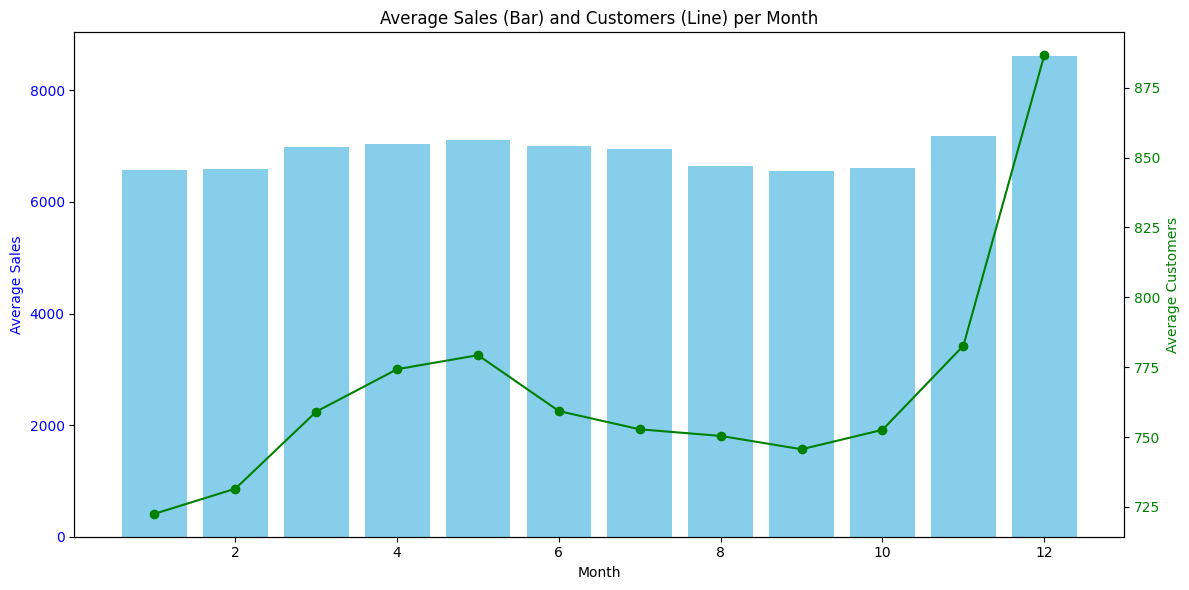

In [82]:
monthly_avg = all_sales.groupby('Month')[['Sales', 'Customers']].mean()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Sales
bars = ax1.bar(monthly_avg.index, monthly_avg['Sales'], color='skyblue', label='Avg Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second axis for Customers (line)
ax2 = ax1.twinx()
line = ax2.plot(monthly_avg.index, monthly_avg['Customers'], color='green', marker='o', label='Avg Customers')
ax2.set_ylabel('Average Customers', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('Average Sales (Bar) and Customers (Line) per Month')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

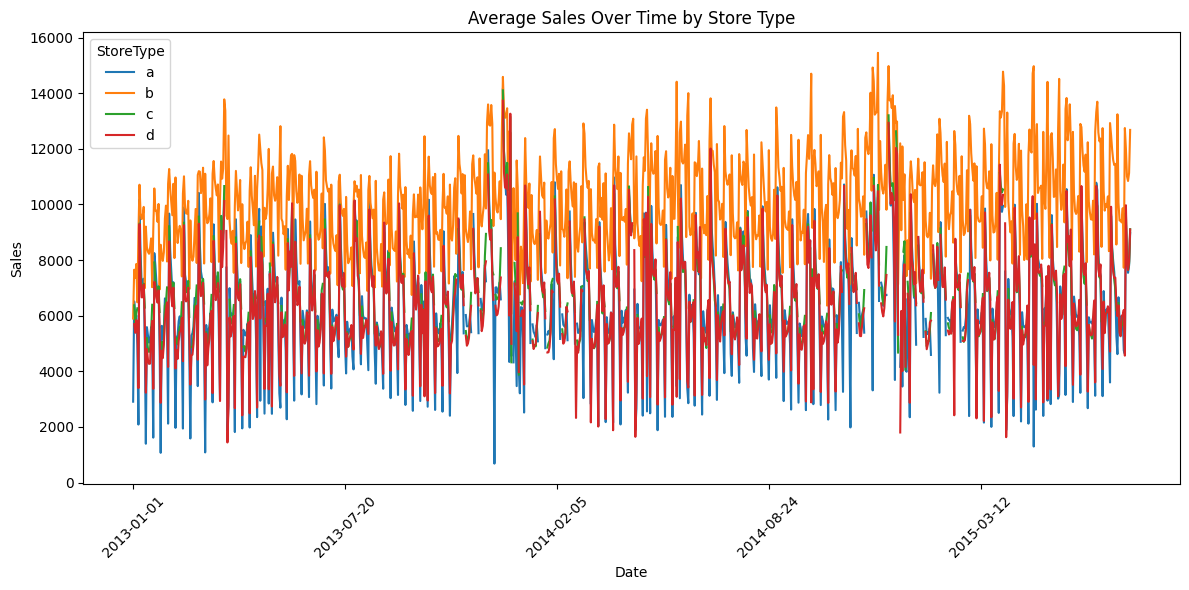

In [84]:
all_sales['Sales'] = pd.to_numeric(all_sales['Sales'], errors='coerce')

# Then group and unstack properly
pivot = all_sales.groupby(['Date', 'StoreType'])['Sales'].mean().unstack()

# Now plot
ax = pivot.plot(figsize=(12,6))
ax.set_title('Average Sales Over Time by Store Type')
ax.set_ylabel('Sales')
ax.set_xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Promo', ylabel='Customers'>

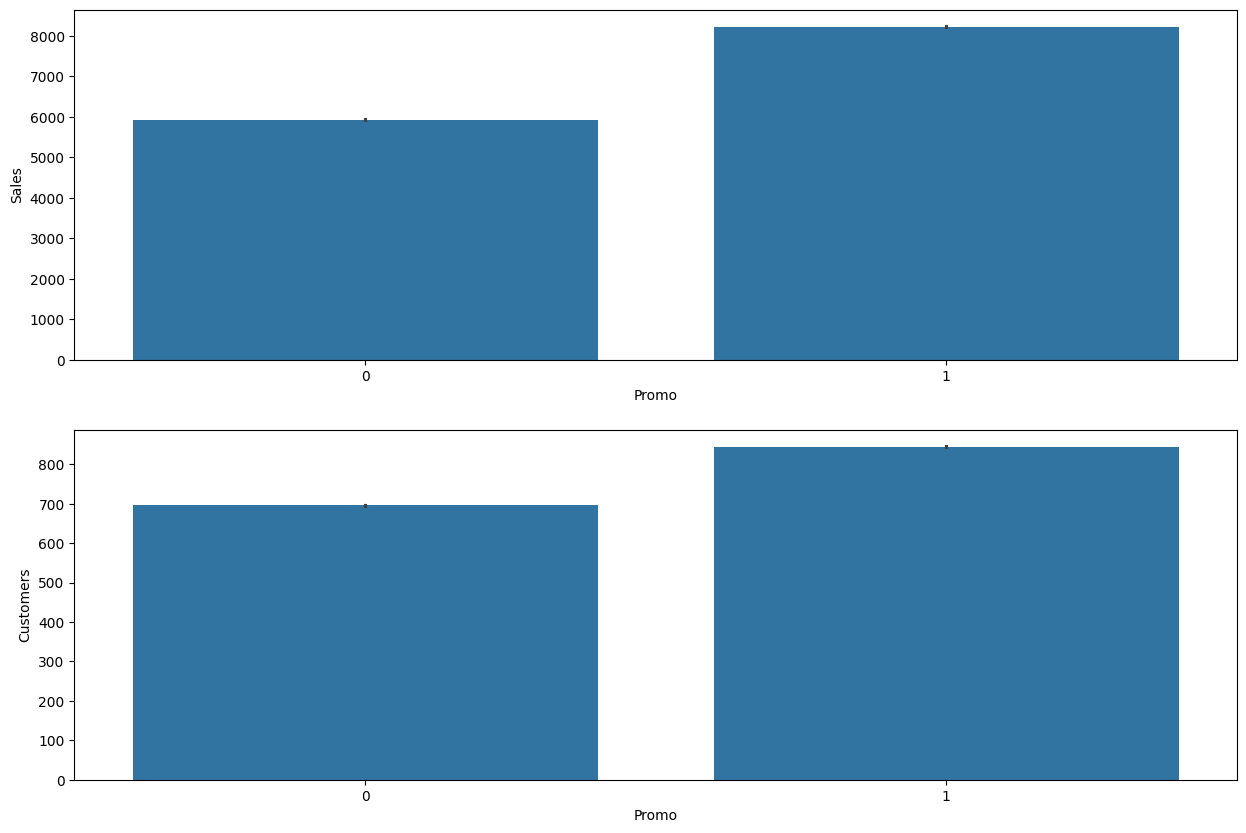

In [86]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data=all_sales)
plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data=all_sales)

<Axes: xlabel='Promo', ylabel='Customers'>

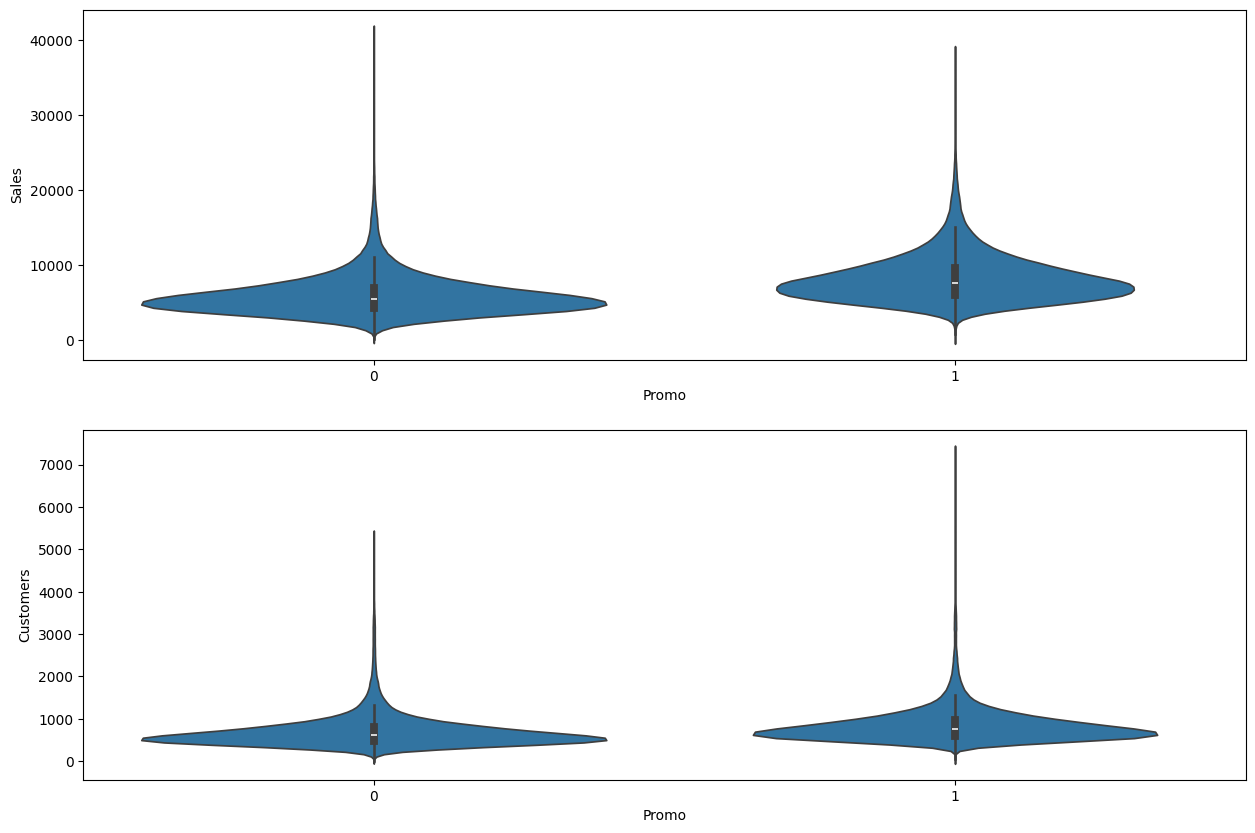

In [87]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data=all_sales)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data=all_sales)

### Facebook Prophet

In [93]:
# Importing prophet
!pip install prophet

  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.70-py3-none-any.whl.metadata (34 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
   ---------------------------------------- 0.0/903.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/903.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/903.1 kB ? eta -:--:--
   ----------------------- ---------------- 524.3/903.1 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 903.1/903.1 kB 2.6 MB/s eta 0:00:00
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from prophet import Prophet


In [101]:
def sales_prediction(store_ID, sales_df, periods):

    sales_df = sales_df[sales_df['Store'] == store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    sales_df= sales_df.sort_values('ds')


    model = Prophet()
    model.fit(sales_df)

    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)

    return sales_df

11:04:55 - cmdstanpy - INFO - Chain [1] start processing
11:04:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,y
843273,2013-01-02,4812
842164,2013-01-03,4675
841056,2013-01-04,5114
839949,2013-01-05,4256
838824,2013-01-07,7804
...,...,...
4461,2015-07-27,7212
3348,2015-07-28,6140
2235,2015-07-29,5524
1122,2015-07-30,6186


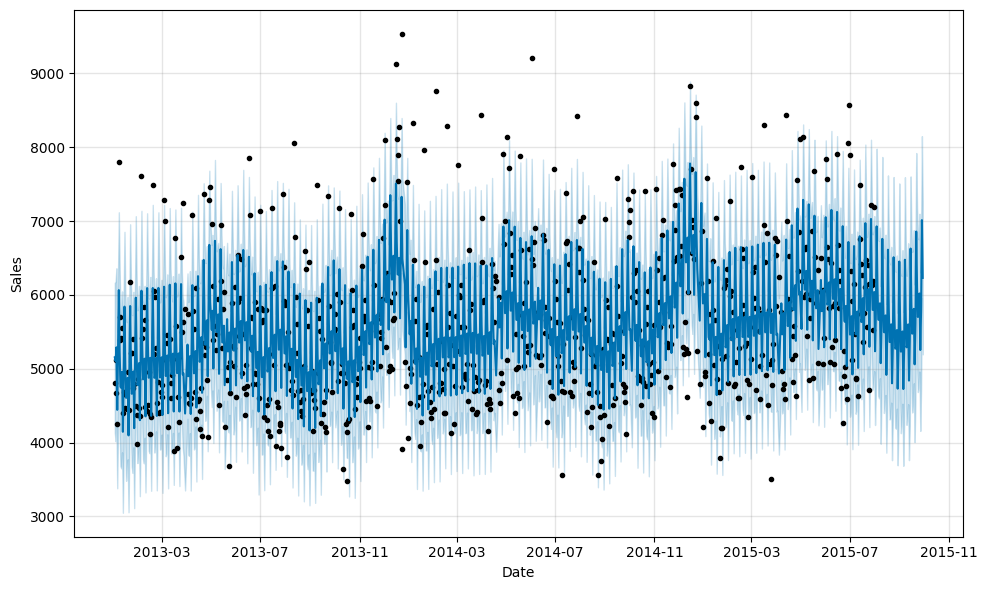

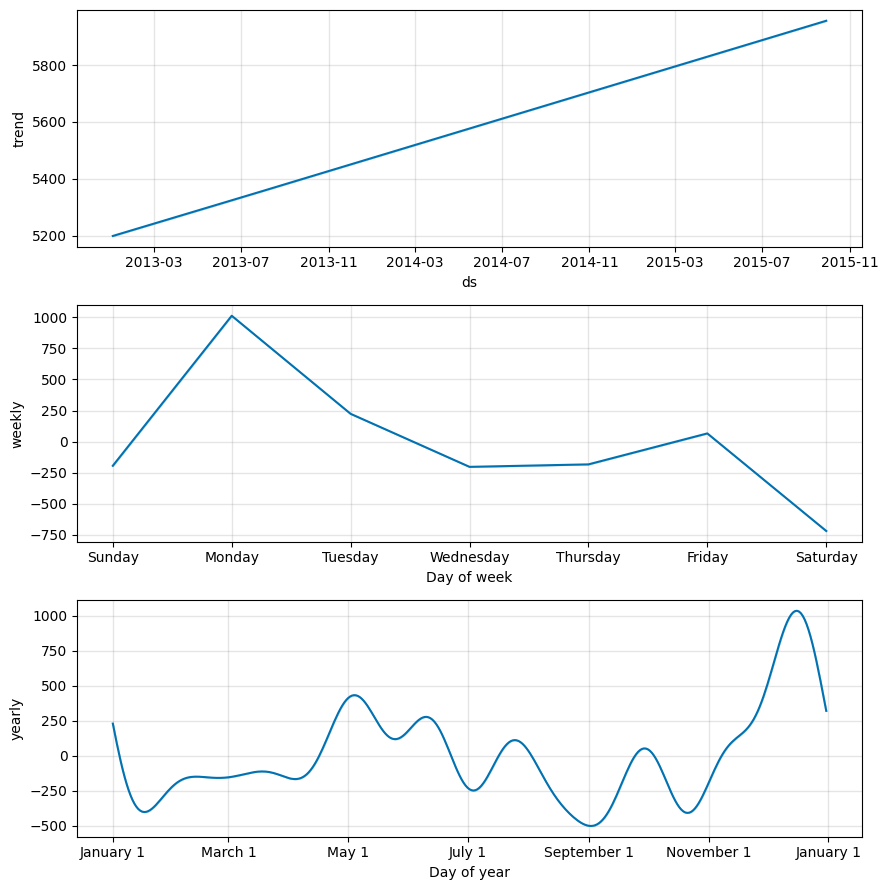

In [102]:
sales_prediction(10, all_sales, 60)

In [103]:
 def sales_prediction(store_ID, sales_df, holidays, periods):

    sales_df = sales_df[sales_df['Store'] == store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    sales_df= sales_df.sort_values('ds')


    model = Prophet(holidays=holidays)
    model.fit(sales_df)

    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)

    return sales_df

In [104]:
school_hols = all_sales[all_sales['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [109]:
school_hols.shape

(163457,)

In [106]:
state_hols = all_sales[(all_sales['StateHoliday'] == 'a') | (all_sales['StateHoliday'] == 'b') | (all_sales['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [108]:
state_hols.shape

(910,)

In [110]:
state_hols = pd.DataFrame({'ds': pd.to_datetime(state_hols),
                           'holiday': 'state_hols'})

In [111]:
state_hols

,ds,holiday
0,2015-06-04,state_hols
1,2015-06-04,state_hols
2,2015-06-04,state_hols
3,2015-06-04,state_hols
4,2015-06-04,state_hols
...,...,...
905,2013-01-01,state_hols
906,2013-01-01,state_hols
907,2013-01-01,state_hols
908,2013-01-01,state_hols


In [112]:
school_hols = pd.DataFrame({'ds': pd.to_datetime(school_hols),
                           'holiday': 'school_hols'})

In [113]:
school_hols

,ds,holiday
0,2015-07-31,school_hols
1,2015-07-31,school_hols
2,2015-07-31,school_hols
3,2015-07-31,school_hols
4,2015-07-31,school_hols
...,...,...
163452,2013-01-01,school_hols
163453,2013-01-01,school_hols
163454,2013-01-01,school_hols
163455,2013-01-01,school_hols


In [115]:
school_state_hols = pd.concat((state_hols, school_hols))

In [116]:
school_state_hols

,ds,holiday
0,2015-06-04,state_hols
1,2015-06-04,state_hols
2,2015-06-04,state_hols
3,2015-06-04,state_hols
4,2015-06-04,state_hols
...,...,...
163452,2013-01-01,school_hols
163453,2013-01-01,school_hols
163454,2013-01-01,school_hols
163455,2013-01-01,school_hols


11:38:42 - cmdstanpy - INFO - Chain [1] start processing
11:38:42 - cmdstanpy - INFO - Chain [1] done processing


,ds,y
843269,2013-01-02,6089
842160,2013-01-03,5398
841052,2013-01-04,6092
839945,2013-01-05,3872
838820,2013-01-07,8591
...,...,...
4457,2015-07-27,5723
3344,2015-07-28,4839
2231,2015-07-29,5275
1118,2015-07-30,4790


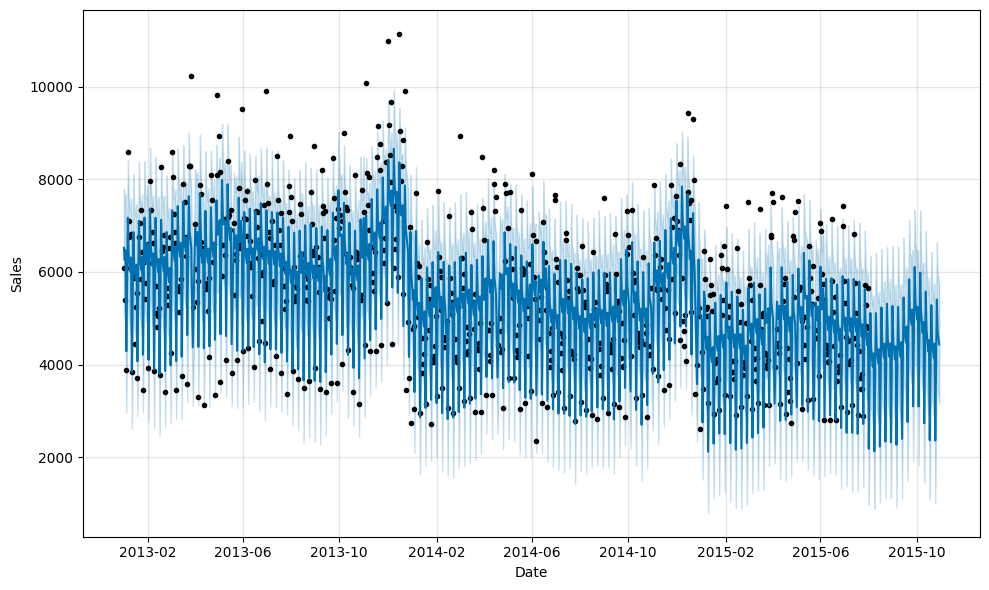

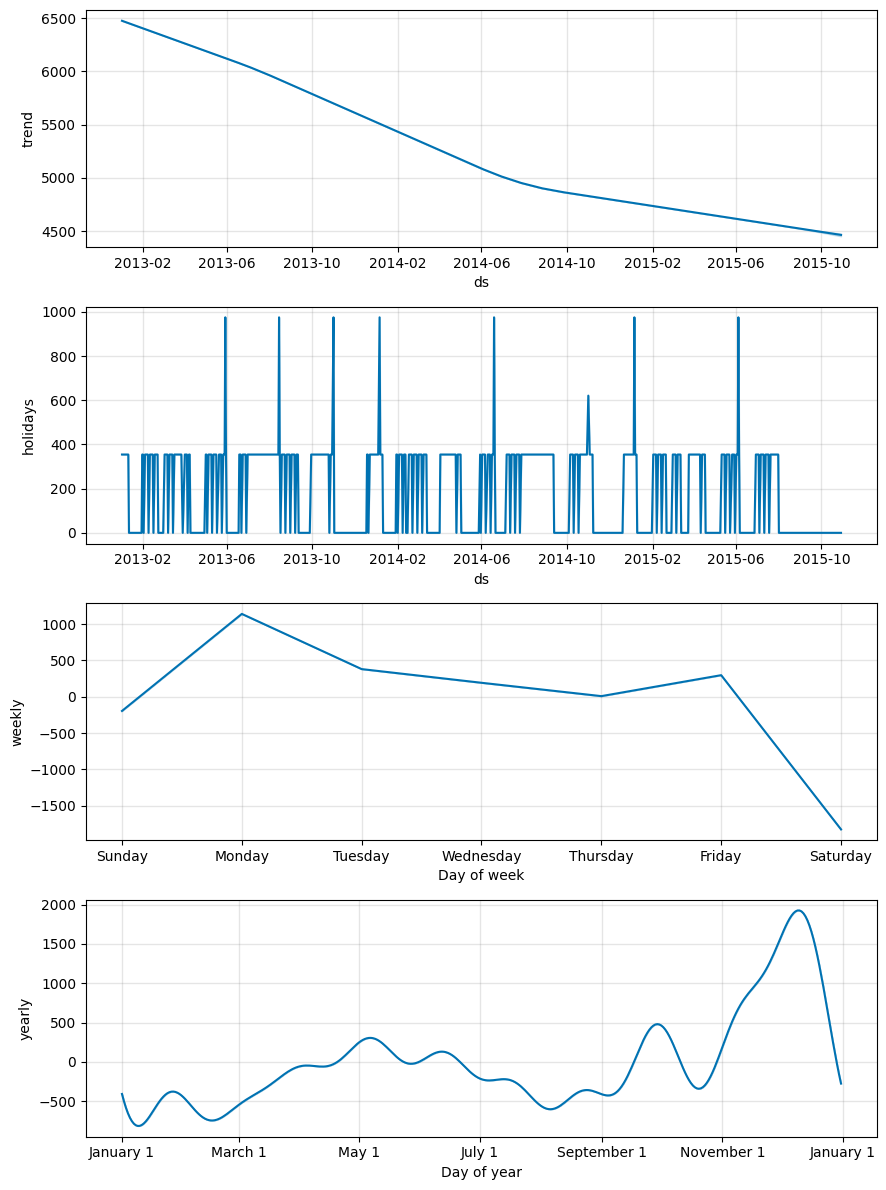

In [117]:
sales_prediction(6, all_sales, school_state_hols, 90)